In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import cv2
from scipy.spatial import cKDTree
from scipy.optimize import minimize
import PredictImage as prim
import os

In [2]:
cur_cam_index = 1
K = np.array([
    [3253.45225, -3.08866451, 4745.21992],
    [0.0, 3252.26117, 3142.22723],
    [0.0, 0.0, 1.0]
], dtype=np.float64)

#D = np.array([0.05003216, -0.04567757, 0.06960187, -0.03096402], dtype=np.float64)
D =np.array([  0.08330459003495257, 0.008459725805467274,  0.000681253494528032, 0.0001603712146519313])

image_filename_current = "C:\\Users\\ablai\\Documents\\photogrammetry\\led-runs-12may2025\\led-runs-12may2025\\c2_img20250512-12_06_55CEST.jpg"

delta_pitch_deg=15.0
delta_yaw_deg=0.0 
delta_roll_deg=0.0 
delta_r=0.0

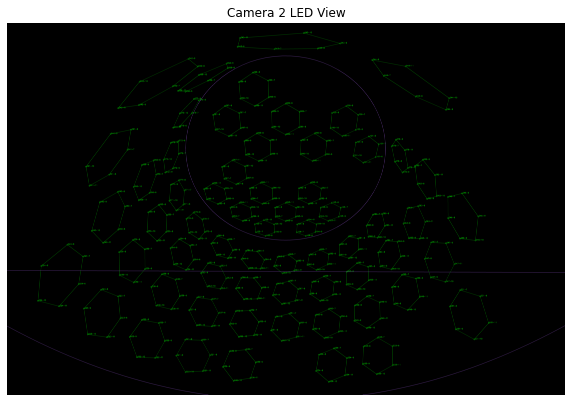

Saved image to camera2_f3253_p15_y0_r0_dr0.png


In [3]:
excluded_pmts = { 25, 26, 28, 29, 30, 32, 35, 45, 57, 59, 60, 61, 74, 75, 76, 77, 79, 85, 91, 96, 99, 102}

prim.simulate_fisheye_view("wcte_geometry_file.json", camera_index=cur_cam_index, K=K, D=D, delta_pitch_deg=delta_pitch_deg, delta_yaw_deg=delta_yaw_deg, delta_roll_deg=delta_roll_deg, delta_r=delta_r, excluded_pmts=excluded_pmts)

In [4]:

blobs = prim.run_blob_detector( image_filename_current )
print('number of blobs before filter:',len(blobs))
blobs_filtered = prim.filter_blobs_by_distance(blobs, 50)
print('number of blobs:',len(blobs_filtered))

number of blobs before filter: 230
number of blobs: 230


In [5]:
prim.draw_image_with_blobs_save( image_filename_current, blobs_filtered, 'c'+str(cur_cam_index+1)+'_with_blob_annotation.jpg' )

Annotated image saved to: c2_with_blob_annotation.jpg


In [6]:
# Initial guess: [pitch, yaw, roll, r, k1, k2, k3, k4]
initial_guess = [delta_pitch_deg, delta_yaw_deg, delta_roll_deg, delta_r, 
                 D[0], D[1], D[2], D[3] ]

matches, fitpars = prim.match_blobs(blobs_filtered, "wcte_geometry_file.json", 
                               cur_cam_index, K, D, initial_guess=initial_guess)

In [7]:
fitpars

{'delta_pitch_deg': 15.238035904400999,
 'delta_yaw_deg': -0.053641273395726996,
 'delta_roll_deg': 0.8584098965604545,
 'delta_r': -0.0027773344149520495,
 'D_fit': array([0.08258358, 0.00832207, 0.00065909, 0.00016642]),
 'chi2': array(276000.),
 'success': True}

In [8]:
len(matches)

227

In [9]:
matches

[('021-6', 3412.631, 5730.1177),
 ('021-7', 3263.968, 5475.0854),
 ('021-8', 2979.8193, 5463.818),
 ('021-9', 2831.43, 5728.169),
 ('021-10', 2994.8628, 6004.5825),
 ('022-6', 2633.3718, 5475.07),
 ('022-7', 2519.319, 5169.718),
 ('022-8', 2229.7903, 5113.8335),
 ('022-9', 2032.3838, 5397.835),
 ('022-10', 2163.8953, 5738.038),
 ('022-11', 2473.6013, 5757.205),
 ('023-7', 1823.9752, 4705.356),
 ('023-8', 1529.1676, 4589.7524),
 ('023-9', 1245.6301, 4904.43),
 ('023-10', 1323.0105, 5338.755),
 ('023-11', 1651.8944, 5399.231),
 ('024-6', 1174.4021, 4500.922),
 ('024-7', 1221.1505, 4013.0347),
 ('024-8', 930.1606, 3804.221),
 ('024-9', 498.759, 4160.506),
 ('024-10', 468.98917, 4748.912),
 ('025-7', 862.5971, 2975.0522),
 ('025-8', 637.9296, 2580.0583),
 ('028-7', 7632.718, 1182.3474),
 ('029-6', 9175.042, 2660.0166),
 ('029-7', 8628.649, 2718.5405),
 ('031-6', 8079.817, 4703.103),
 ('031-7', 7737.2944, 4604.316),
 ('031-8', 7544.841, 4890.842),
 ('031-9', 7641.4883, 5284.819),
 ('031-11'

In [10]:
img = prim.visualize_all_leds_and_matches( 
    image_filename_current,
    blobs,
    matches,
    fitpars,
    "wcte_geometry_file.json",
    cur_cam_index,
    K,
    fitpars['D_fit'],
    output_filename='c'+str(cur_cam_index+1)+"_blob_match_overlay.png",
    excluded_pmts=excluded_pmts
)


{'delta_pitch_deg': 15.238035904400999, 'delta_yaw_deg': -0.053641273395726996, 'delta_roll_deg': 0.8584098965604545, 'delta_r': -0.0027773344149520495, 'D_fit': array([0.08258358, 0.00832207, 0.00065909, 0.00016642]), 'chi2': array(276000.), 'success': True}
Overlay image saved to: c2_blob_match_overlay.png


In [11]:
output_filename = os.path.splitext( os.path.basename(image_filename_current) )[0] + ".json"

prim.save_matching_results_to_json(
    output_filename=output_filename,
    image_filename=image_filename_current,
    fitpars=fitpars, 
    matches=matches, 
    blobs=blobs, 
    geo_file="wcte_geometry_file.json", 
    camera_index=cur_cam_index, 
    K=K, 
    D=fitpars['D_fit'], 
    excluded_pmts=excluded_pmts)

excluded_pmts= {74, 75, 76, 77, 79, 85, 25, 26, 91, 28, 29, 30, 32, 96, 35, 99, 102, 45, 57, 59, 60, 61}
geo_file= wcte_geometry_file.json
Sample matches labels: [('021-6', 3412.631, 5730.1177), ('021-7', 3263.968, 5475.0854), ('021-8', 2979.8193, 5463.818), ('021-9', 2831.43, 5728.169), ('021-10', 2994.8628, 6004.5825), ('022-6', 2633.3718, 5475.07), ('022-7', 2519.319, 5169.718), ('022-8', 2229.7903, 5113.8335), ('022-9', 2032.3838, 5397.835), ('022-10', 2163.8953, 5738.038)]
Sample label_to_sim keys: ['021-6', '021-7', '021-8', '021-9', '021-10', '021-11', '022-6', '022-7', '022-8', '022-9']
Saved results to c2_img20250512-12_06_55CEST.json
